<a href="https://colab.research.google.com/github/Aikhusy/Random/blob/main/ULARNAGA/micinlearning/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract

In [3]:

def plot_images(images, titles):
    num_images = len(images)
    num_columns = 3  # 3 gambar per baris
    num_rows = (num_images + num_columns - 1) // num_columns  # Hitung jumlah baris yang diperlukan

    plt.figure(figsize=(15, 5))  # Atur ukuran gambar secara keseluruhan

    for i in range(num_images):
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])

    plt.show()

In [4]:
import os
import random

def randomImagePicker(nImage):
    folder_path = 'dummy'
    image_files = os.listdir(folder_path)

    num_images_to_select = 5
    selected_images = random.sample(image_files, num_images_to_select)

    selected_images_with_path = [os.path.join(folder_path, image) for image in selected_images]
    return selected_images_with_path

In [5]:
def histogramEq(image):
  histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

  # Normalisasi histogram
  cdf = histogram.cumsum()
  cdf_normalized = cdf * 255 / cdf[-1]

  mapping = cdf_normalized.astype('uint8')

  equalized_image = mapping[image]

  return equalized_image


In [6]:
# konvolusi pada gambar
def convolution2d(image,kernel,stride,padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    padded_image = np.zeros((image_height + kernel_height - 1, image_width + kernel_width - 1))
    padded_image[kernel_height // padding:image_height + kernel_height // padding, kernel_width // padding:image_width + kernel_width // padding] = image

    convolved_image = np.zeros((image_height, image_width))
    for i in range(image_height):
      for j in range(image_width):
        convolved_image[i, j] = np.sum(padded_image[i*stride:i*stride + kernel_height, j*stride:j*stride + kernel_width] * kernel)

    return convolved_image

In [7]:
#clustering warna gambar
def clusteringWarna (k,image):
    k = 2
    newImage = image.reshape((-1, 1))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(newImage)
    cluster_centers = kmeans.cluster_centers_.astype(np.uint8)
    segmented_image = cluster_centers[kmeans.labels_].reshape(image.shape)

    # Tampilkan citra sebelum dan sesudah segmentasi

    return segmented_image

In [8]:
folderImage= randomImagePicker(5)
print(folderImage)

['dummy\\B2476UO_PNG.rf.ef594b485af15784c9ba8abba7eee92c.jpg', 'dummy\\BG1985A_png.rf.cb67a6bb3be8b643e9c7d15202c96344.jpg', 'dummy\\17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg', 'dummy\\B3326UB_png.rf.ae55e0c0bf99c732265edf021f844bf9.jpg', 'dummy\\B3600LO_png.rf.5eb980772646a9fdac8faa4c9c315ada.jpg']


In [9]:
def imageToText(images):
    texts=[]
    for image in images:
        pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
        text = pytesseract.image_to_string(image)
        print(text)
        texts.append(text)

    return texts

c:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

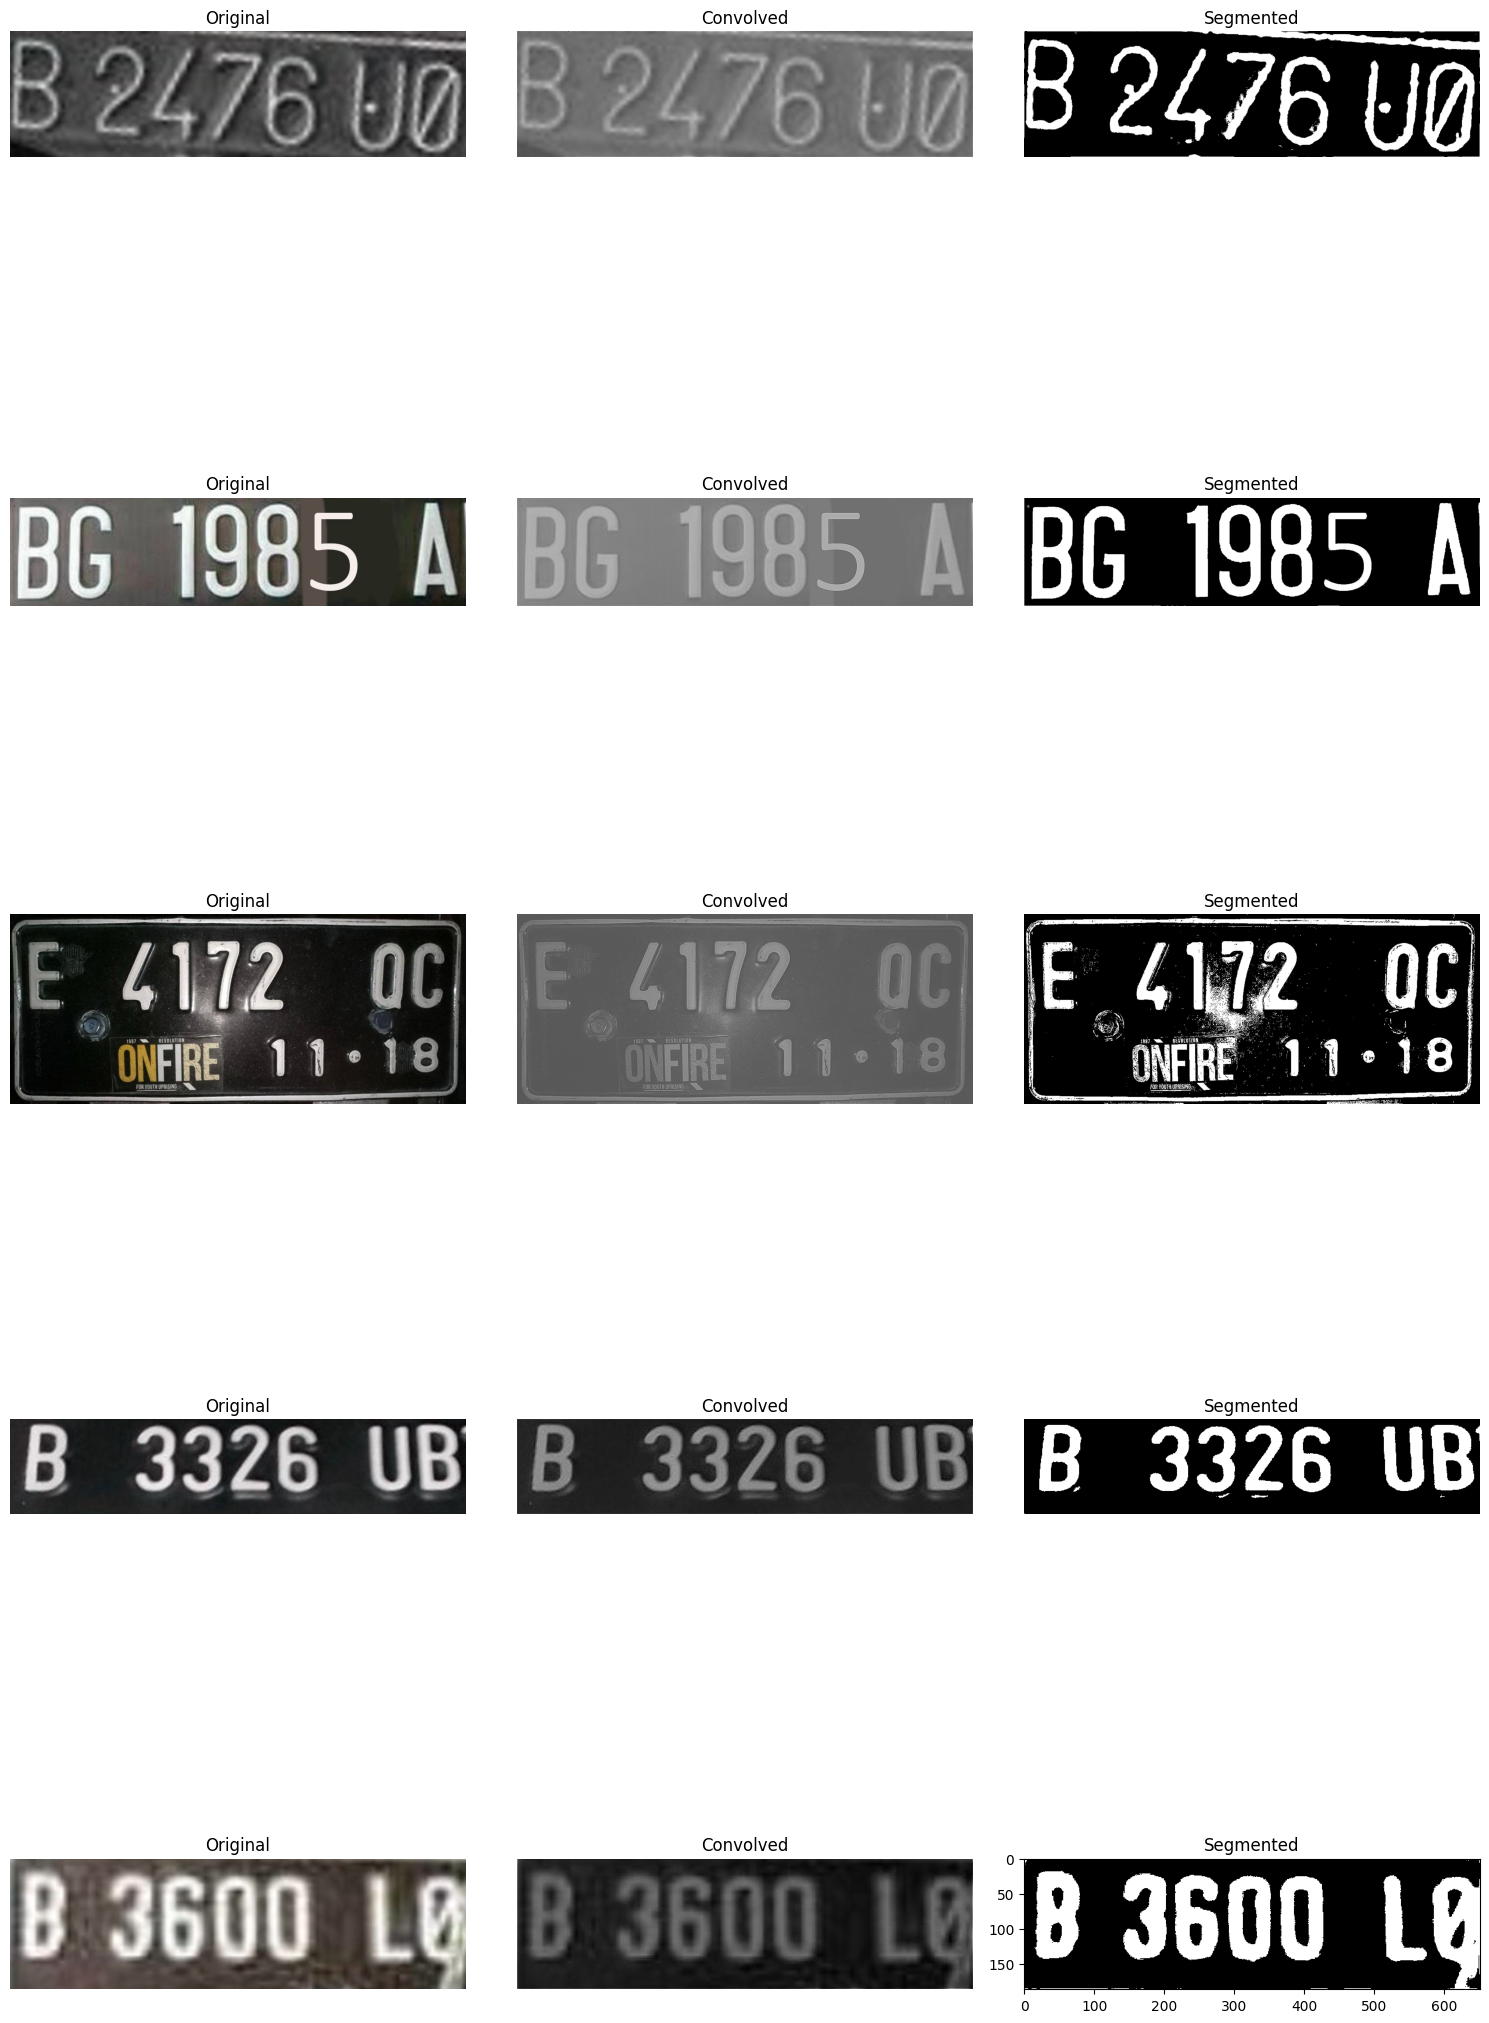

In [10]:
num_rows = len(folderImage)
num_cols = 3
imagess=[]
# Buat subplot dengan jumlah baris dan kolom yang sesuai
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, each in enumerate(folderImage):
    read = cv2.imread(each)
    img_gray = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)

    kernel = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]])

    convolved_image = convolution2d(img_gray, kernel, 1, 2)
    segmented_image = clusteringWarna(2, convolved_image)

    row = i
    col = 0

    axs[row, col].imshow(read, cmap='gray')
    axs[row, col].set_title('Original')

    col += 1

    axs[row, col].imshow(convolved_image, cmap='gray')
    axs[row, col].set_title('Convolved')

    col += 1

    axs[row, col].imshow(segmented_image, cmap='gray')
    axs[row, col].set_title('Segmented')
    imagess.append(segmented_image)
# Menghilangkan label dari subplot yang tidak digunakan
for i in range(num_rows):
    for j in range(3):
        if i != num_rows - 1 or j != 2:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()  # Tampilkan semua subplot

In [11]:
imageToText(imagess)

B 2476 UB




B 3326 UB

B 3600 La



['B 2476 UB\n\n', '', '', 'B 3326 UB\n', 'B 3600 La\n']